## Analysis of WHO Mortality rate data

In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.utils import shuffle

#read the input file
x = pd.read_csv('Morticd10_part2.csv')

#read Country file
country_df=pd.read_csv('Country.csv')
#print(country)

#read Cause file
cause_df=pd.read_csv('Cause.csv')
#print(Cause)

#merging with cause dataset
x=x.merge(cause_df,left_on='Cause',right_on='Code')
#print(x)

x = shuffle(x) 
#taking only 10000 rows 
last_entries = x.tail(15000)
#print(x.columns)
mortality_df = (last_entries[['Country','Year','Cause_x','Sex','Deaths2','Deaths8','Deaths13','Deaths22','Cause_y']])

#merging with country dataset
mortality_df=mortality_df.merge(country_df)
#print(mortality_df.columns)

mortality_df = (mortality_df[['Country','Year','Cause_x','Sex','Deaths2','Deaths8','Deaths13','Deaths22','Cause_y','Name']])
mortality_df.columns=['Country_code','Year','Cause_code','Sex','Deaths2','Deaths8','Deaths13','Deaths22','Cause','Country']

#cleansing 

#removing records with invalid sex data

mortality_df = mortality_df.drop(mortality_df[mortality_df['Sex']==9].index)
mortality_df = mortality_df.dropna()
#print(len(mortality_df))


#removing rows with no death values
mortality_df=mortality_df[mortality_df['Deaths2']+mortality_df['Deaths8']+mortality_df['Deaths13']+mortality_df['Deaths22']>0]
#print((mortality_df))


mortality_df.to_csv('out.csv',index=None,header=True)
#print(mortality_df.shape)

mortality_df = pd.read_csv('out.csv')

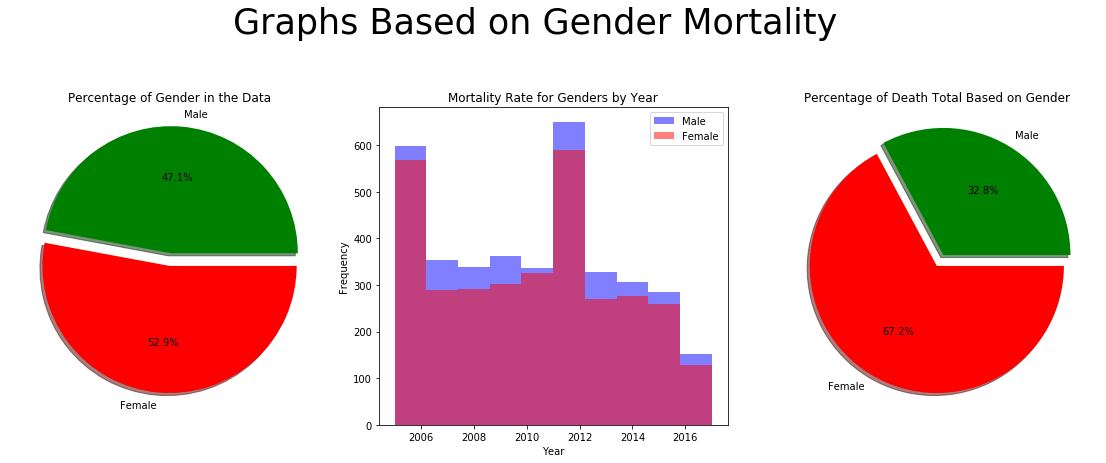

In [2]:
#Total number of men and women
#print(mortality_df.shape)

male = mortality_df[mortality_df['Sex']==1]
female = mortality_df[mortality_df['Sex']==2]

male_female_no =((mortality_df['Sex']==2).sum(),(mortality_df['Sex']==1).sum())
maleD = (male['Deaths2'] + male['Deaths8'] + male['Deaths13'] + male['Deaths22']).sum()
femaleD = (female['Deaths2'] + female['Deaths8'] + female['Deaths13'] + female['Deaths22']).sum()
both = maleD, femaleD

colors = ['green' , 'red']
labels = ['Male' , 'Female']
explode = [0.1,0]

gs = plt.GridSpec(2,3, wspace=0.1, hspace=0.3)
fig = plt.figure(figsize=(20,14))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax4 = plt.subplot(gs[2])

st = fig.suptitle("Graphs Based on Gender Mortality", fontsize=35)
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

ax1.pie(male_female_no,colors=colors, labels=labels, explode=explode,autopct='%1.1f%%', shadow=True)
ax1.set_title("Percentage of Gender in the Data")

ax2.hist(male['Year'],bins=10,histtype='stepfilled',color='blue',alpha=.5,label='Male')
ax2.hist(x=female['Year'],bins=10,histtype='stepfilled',color='red',alpha=.5,label='Female')
ax2.set_xlabel("Year")
ax2.set_ylabel("Frequency")
ax2.legend()
ax2.set_title("Mortality Rate for Genders by Year")

ax4.pie(both,colors=colors, labels=labels, explode=explode,autopct='%1.1f%%', shadow=True)
ax4.set_title('Percentage of Death Total Based on Gender')
ax4.yaxis.tick_right()



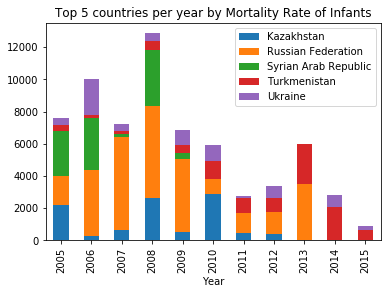

In [3]:
#infant death rate in 5 top most countries per each year

infant=mortality_df[['Year','Country','Deaths2','Cause']]
infant_top5c=infant['Deaths2'].groupby(infant['Country']).sum().sort_values(ascending=False).head(5)
infant_top5c=infant_top5c.index
infant_yr_top5c=infant[infant['Country'].isin(infant_top5c)]
infant_yr_top5c_g=infant_yr_top5c['Deaths2'].groupby([infant_yr_top5c['Year'],infant_yr_top5c['Country']]).sum()

infant_yr_top5c_g.unstack().plot(kind='bar',stacked=True)
plt.legend(loc=1)
plt.title('Top 5 countries per year by Mortality Rate of Infants')
plt.show()


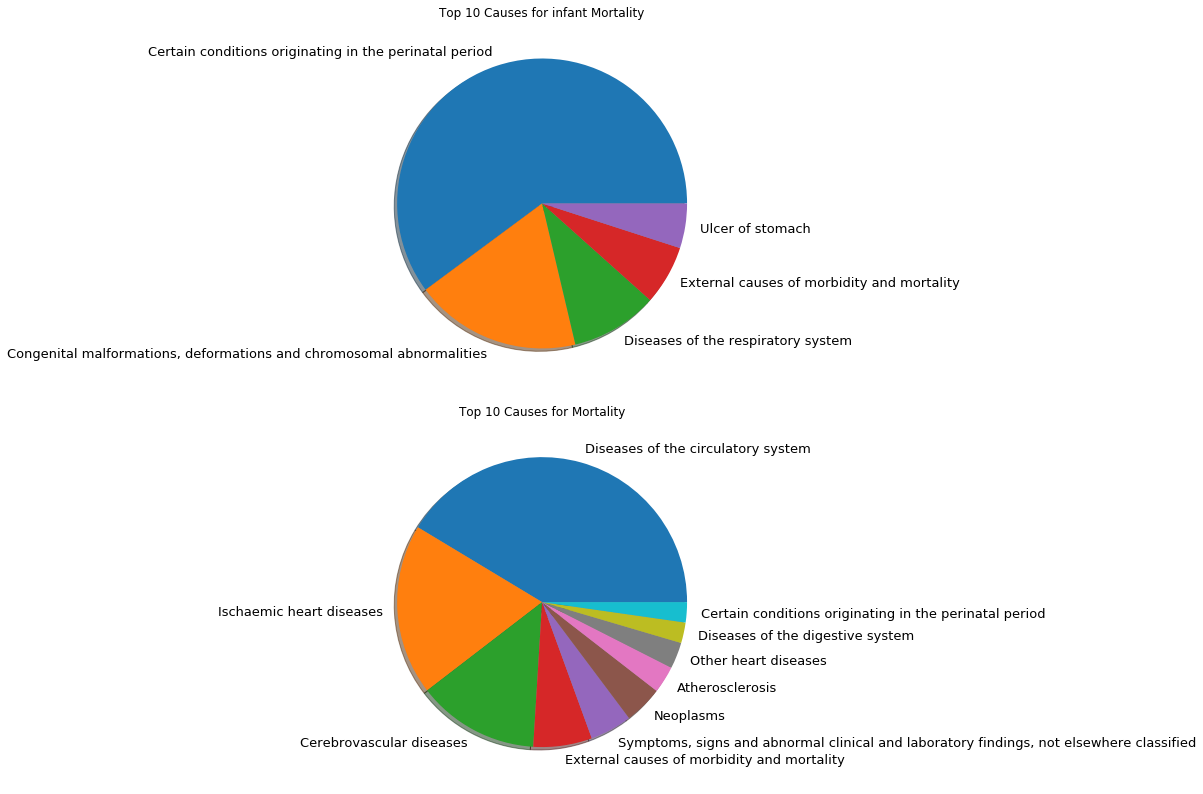

In [4]:
#top 10 causes for high death rate

inf_death=mortality_df[['Cause','Deaths2']].groupby('Cause').sum(axis=1)
inf_death=inf_death.sum(axis=1).sort_values(ascending=False)
inf_death_5=inf_death.head(5)
cause_death=mortality_df[['Cause','Deaths2','Deaths8','Deaths13','Deaths22']].groupby('Cause').sum(axis=1)
cause_death_sort=cause_death.sum(axis=1).sort_values(ascending=False)
cause_death_sort_10=cause_death_sort.head(10)

gs = plt.GridSpec(2,1, wspace=0.1, hspace=0.1)
fig = plt.figure(figsize=(14,14))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

label=inf_death_5.index
ax1.pie(inf_death_5.values,shadow=True,labels=label,textprops={'fontsize': 13})
ax1.set_title('Top 10 Causes for infant Mortality')

label=cause_death_sort_10.index
ax2.pie(cause_death_sort_10.values,shadow=True,labels=label,textprops={'fontsize': 13})
ax2.set_title('Top 10 Causes for Mortality')
plt.show()

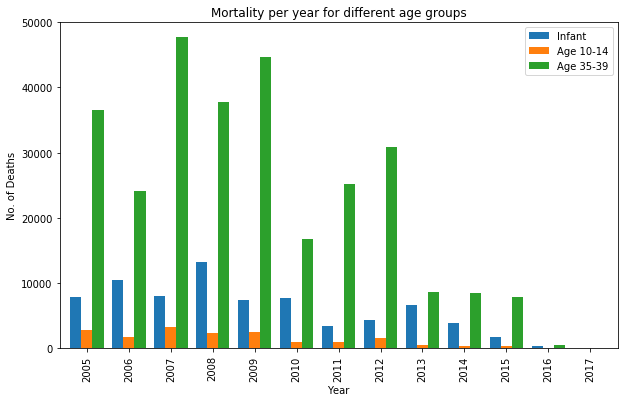

In [5]:
#total death rate per each year

x=mortality_df[['Deaths2','Deaths8','Deaths13']].groupby(mortality_df['Year']).sum(axis=1)
x.plot(kind='bar',width=0.8,figsize=(10,6))
plt.legend(['Infant','Age 10-14','Age 35-39'],loc=1)
plt.ylim(0,50000)
plt.title('Mortality per year for different age groups')
plt.xlabel('Year')
plt.ylabel('No. of Deaths')
plt.show()


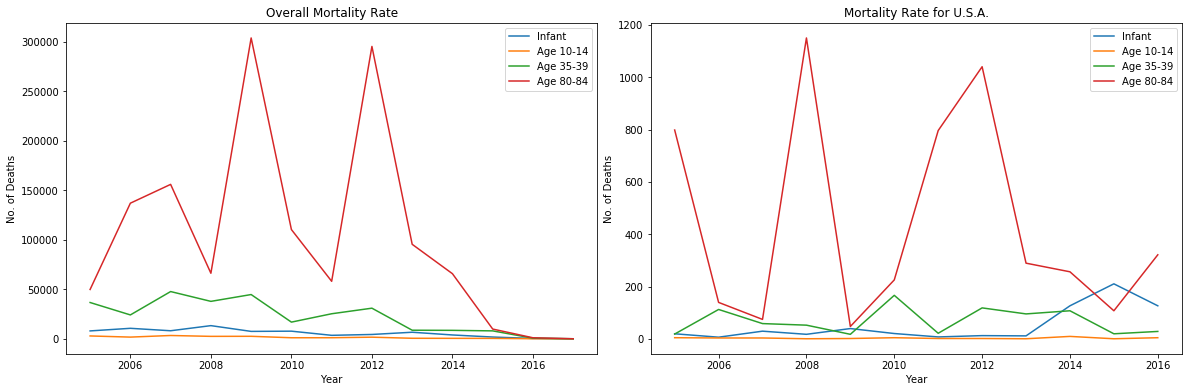

In [6]:
#total death rate per each year for each agegroup

gs = plt.GridSpec(2,2, wspace=0.1, hspace=0.3)
fig = plt.figure(figsize=(20,14))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])

death_agegrp=mortality_df[['Deaths2','Deaths8','Deaths13','Deaths22']].groupby(mortality_df['Year']).sum(axis=1)
ax1.plot(death_agegrp)
ax1.set_title('Overall Mortality Rate')
ax1.legend(['Infant','Age 10-14','Age 35-39','Age 80-84'],loc=1)
ax1.set_xlabel('Year')
ax1.set_ylabel('No. of Deaths')


USA=mortality_df[mortality_df['Country']=='United States of America']
USA_agegrp=USA[['Deaths2','Deaths8','Deaths13','Deaths22']].groupby(USA['Year']).sum(axis=1)
ax2.plot(USA_agegrp)
ax2.set_title('Mortality Rate for U.S.A.')
ax2.legend(['Infant','Age 10-14','Age 35-39','Age 80-84'],loc=1)
ax2.set_xlabel('Year')
ax2.set_ylabel('No. of Deaths')
plt.show()




In [7]:
#top 10 Country and total death rates

Country_merg_1=mortality_df[['Country','Deaths2','Deaths8','Deaths13','Deaths22']]
country_grp=Country_merg_1.groupby(Country_merg_1['Country']).sum(axis=1)
country_sort=country_grp.sum(axis=1).sort_values(ascending=False)
print(country_sort.head(10))


Country
Russian Federation          1085842.0
Ukraine                      408265.0
Kazakhstan                    78308.0
Belarus                       48087.0
Turkmenistan                  27450.0
Syrian Arab Republic          23628.0
South Africa                  14973.0
United States of America       6753.0
Brazil                         5923.0
Japan                          4689.0
dtype: float64


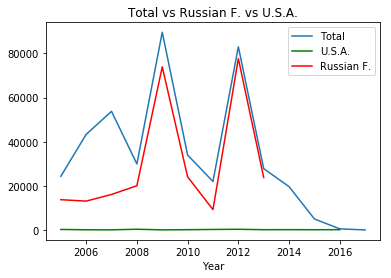

In [8]:
##Comparison of total death rate with USA and Russian Federation
#total death rate per each year

death_agegrp=mortality_df[['Deaths2','Deaths8','Deaths13','Deaths22']].groupby(mortality_df['Year']).sum(axis=1)
death_agegrp_mn=death_agegrp.mean(axis=1)
death_agegrp_mn.plot(kind='line')

USA=mortality_df[mortality_df['Country']=='United States of America']
USA_agegrp=USA[['Deaths2','Deaths8','Deaths13','Deaths22']].groupby(USA['Year']).sum(axis=1)
USA_agegrp_mn=USA_agegrp.mean(axis=1)
USA_agegrp_mn.plot(kind='line',color='g')


J=mortality_df[mortality_df['Country']=='Russian Federation']
J_agegrp=J[['Deaths2','Deaths8','Deaths13','Deaths22']].groupby(J['Year']).sum(axis=1)
J_agegrp_mn=J_agegrp.mean(axis=1)

J_agegrp_mn.plot(kind='line',color='r')
plt.legend(['Total','U.S.A.','Russian F.'],loc=1)
plt.title('Total vs Russian F. vs U.S.A.')
plt.show()



In [9]:

#mean and std of all

infant_mean_all=mortality_df['Deaths2'].mean()
infant_std_all=mortality_df['Deaths2'].std()

infant_country_mean=mortality_df['Deaths2'].groupby(mortality_df['Country']).mean()
print('LIST Of COUNTRIES WITH MEAN GREATER THAN TOTAL AVERAGE INFANT DEATH RATE:')
print(infant_country_mean[infant_country_mean.values>infant_mean_all])

print('\nLIST Of COUNTRIES WHOSE INFANT DEATH RATE IS OUTSIDE 1 STD DEVIATION FROM THE TOTAL MEAN:')
out_std=mortality_df[abs(mortality_df['Deaths2']-infant_mean_all)>=infant_std_all]
print(out_std['Country'].drop_duplicates())


LIST Of COUNTRIES WITH MEAN GREATER THAN TOTAL AVERAGE INFANT DEATH RATE:
Country
Kazakhstan              36.322464
Russian Federation      92.248408
South Africa            23.168675
Syrian Arab Republic    81.354839
Turkmenistan            31.278481
Ukraine                 24.292359
Name: Deaths2, dtype: float64

LIST Of COUNTRIES WHOSE INFANT DEATH RATE IS OUTSIDE 1 STD DEVIATION FROM THE TOTAL MEAN:
937               Kazakhstan
1655                 Ukraine
2176                 Belarus
2635                  Brazil
3246            South Africa
4153                  Mexico
4497      Russian Federation
5165            Turkmenistan
5587             Philippines
6133               Guatemala
6338    Syrian Arab Republic
Name: Country, dtype: object


In [10]:
death_0 = mortality_df['Deaths2']
death_10 = mortality_df['Deaths8']
death_35 = mortality_df['Deaths13']
death_80 = mortality_df['Deaths22']
print('\t','\t','Infant','\t','Age 10-14','\t','Age 35-39','\t','Age 80-84')
print(" Sum",'\t','\t',death_0.sum(),'\t\t',death_10.sum(),'\t\t',death_35.sum(),'\t',death_80.sum())
print(" Max",'\t','\t',death_0.max(),'\t\t',death_10.max(),'\t\t',death_35.max(),'\t\t',death_80.max())
print(" Min",'\t','\t',death_0.min(),'\t','\t',death_10.min(),'\t','\t',death_35.min(),'\t','\t',death_80.min())
print(" Mean",'\t','\t',round(death_0.mean(),2),'\t','\t',round(death_10.mean(),2),'\t','\t',round(death_35.mean(),2),'\t','\t',round(death_80.mean(),2))
print(" Std deviation",'\t',round(np.std(death_0),2),'\t',round(np.std(death_10),2),'\t','\t',round(np.std(death_35),2),'\t',round(np.std(death_80),2))


	 	 Infant 	 Age 10-14 	 Age 35-39 	 Age 80-84
 Sum 	 	 75194.0 		 17694.0 		 289397.0 	 1348143.0
 Max 	 	 3889.0 		 1177.0 		 17722.0 		 156614.0
 Min 	 	 0.0 	 	 0.0 	 	 0.0 	 	 0.0
 Mean 	 	 10.73 	 	 2.53 	 	 41.3 	 	 192.4
 Std deviation 	 105.05 	 26.04 	 	 415.83 	 3337.37


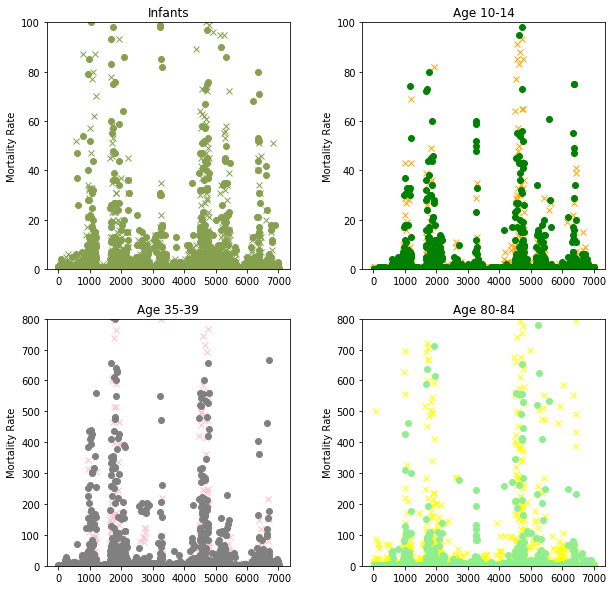

In [11]:
males = mortality_df[mortality_df['Sex']==1]
females = mortality_df[mortality_df['Sex']==2]
males_2 = males['Deaths2']
females_2 = females['Deaths2']
males_10 = males['Deaths8']
females_10 = females['Deaths8']
males_35 = males['Deaths13']
females_35 = females['Deaths13']
males_80 = males['Deaths2']
females_80 = females['Deaths22']

gs = plt.GridSpec(2, 2,wspace=0.3,hspace=0.2)
fig = plt.figure(figsize=(10,10))

colors= np.random.rand(3)
ax1 = plt.subplot(gs[0, 0])
ax1.plot(females_2, color=colors,marker='x', linestyle='', label="Female")
ax1.plot(males_2, color=colors, marker='o', linestyle='', label="Male")
ax1.set_ylim(0,100)
ax1.set_ylabel('Mortality Rate')
ax1.set_title('Infants')

ax2 = plt.subplot(gs[0, 1])
ax2.plot(females_10, color='orange',marker='x', linestyle='', label="Female")
ax2.plot(males_10, color='green', marker='o', linestyle='', label="Male")
ax2.set_ylim(0,100)
ax2.set_ylabel('Mortality Rate')
ax2.set_title('Age 10-14')
 
ax3 = plt.subplot(gs[1, 0])
ax3.plot(females_35, color='pink',marker='x', linestyle='', label="Female")
ax3.plot(males_35, color='grey', marker='o', linestyle='', label="Male")
ax3.set_ylim(0,800)
ax3.set_ylabel('Mortality Rate')
ax3.set_title('Age 35-39')

ax4 = plt.subplot(gs[1, 1])
ax4.plot(females_80, color='yellow',marker='x', linestyle='', label="Female")
ax4.plot(males_80, color='lightgreen', marker='o', linestyle='', label="Male")
ax4.set_ylim(0,800)
ax4.set_ylabel('Mortality Rate')
ax4.set_title('Age 80-84')

plt.show()

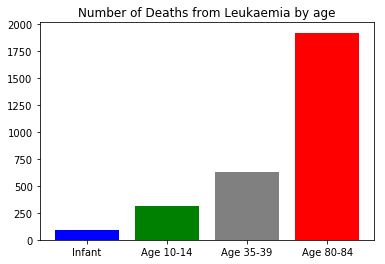

In [12]:
leukaemia = mortality_df[mortality_df['Cause']=='Leukaemia']

deaths2L = leukaemia['Deaths2'].sum()
deaths8L = leukaemia['Deaths8'].sum()
deaths13L = leukaemia['Deaths13'].sum()
deaths22L = leukaemia['Deaths22'].sum()

xCoord = ['Infant', 'Age 10-14', 'Age 35-39', 'Age 80-84']

colors = ['b','green','grey','red']
allL = [deaths2L, deaths8L, deaths13L, deaths22L]
barwidth=0.3
plt.bar(xCoord, allL, align='center', color=colors)
plt.title('Number of Deaths from Leukaemia by age')
plt.show()


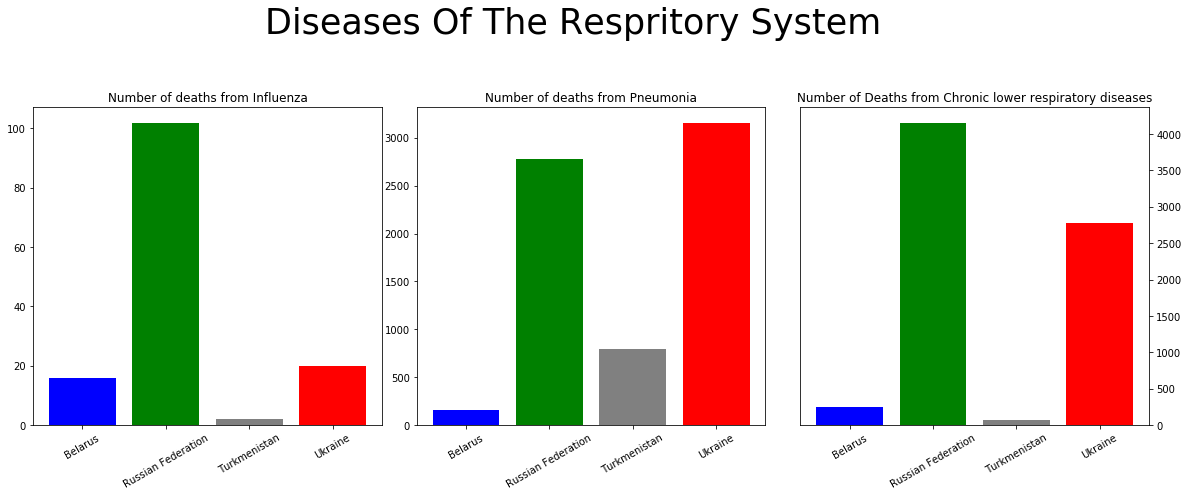

In [13]:
influenza = mortality_df[mortality_df['Cause']=='Influenza']
pneumonia = mortality_df[mortality_df['Cause']=='Pneumonia']
lowerRes = mortality_df[mortality_df['Cause']=='Chronic lower respiratory diseases']
asthma = mortality_df[mortality_df['Cause']=='Asthma']

influAll = influenza.groupby([influenza['Country']]).sum()
pneAll = pneumonia.groupby([pneumonia['Country']]).sum()
lowAll = lowerRes.groupby([lowerRes['Country']]).sum()
asAll = asthma.groupby([asthma['Country']]).sum()
influAll = influenza[influenza['Country'].isin(['Belarus', 'Russian Federation', 'Turkmenistan', 'Ukraine'])]
pneAll = pneumonia[pneumonia['Country'].isin(['Belarus','Russian Federation', 'Turkmenistan', 'Ukraine'])]
lowAll = lowerRes[lowerRes['Country'].isin(['Belarus','Russian Federation', 'Turkmenistan', 'Ukraine'])]

influAll = influAll.groupby([influAll['Country']]).sum()
pneAll = pneAll.groupby([pneAll['Country']]).sum()
lowAll = lowAll.groupby([lowAll['Country']]).sum()

deathsinf = (influAll['Deaths2'] + influAll['Deaths8'] + influAll['Deaths13'] + influAll['Deaths22'])
deathspne = (pneAll['Deaths2'] + pneAll['Deaths8'] + pneAll['Deaths13'] + pneAll['Deaths22'])
deathslow = (lowAll['Deaths2'] + lowAll['Deaths8'] + lowAll['Deaths13'] + lowAll['Deaths22'])

gs=plt.GridSpec(2,3, wspace=0.1, hspace=0.3)
fig = plt.figure(figsize=(20,14))
ax1 = plt.subplot(gs[0])
ax2 = plt.subplot(gs[1])
ax3 = plt.subplot(gs[2])


xCoord = ['Belarus','Russian Federation', 'Turkmenistan', 'Ukraine']
colors=['b','green','grey','r']

st = fig.suptitle("Diseases Of The Respritory System", fontsize=35)
st.set_y(0.95)
fig.subplots_adjust(top=0.85)

ax1.bar(xCoord, deathsinf, align='center', color = colors)
ax1.set_title("Number of deaths from Influenza")
plt.setp(ax1.xaxis.get_majorticklabels(), rotation=30)

ax2.bar(xCoord, deathspne, align='center',color=colors)
ax2.set_title("Number of deaths from Pneumonia")
plt.setp(ax2.xaxis.get_majorticklabels(), rotation=30)

ax3.bar(xCoord, deathslow, align='center',color=colors)
ax3.set_title('Number of Deaths from Chronic lower respiratory diseases')
ax3.yaxis.tick_right()
plt.setp(ax3.xaxis.get_majorticklabels(), rotation=30)
plt.show()
